In [6]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [7]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
pd.set_option('html', False)
%matplotlib inline

In [21]:
file_mar_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/mar/03_24.mat')
mar_24 = blt.import_var_mat_VC(file_mar_24)
file_mar_48 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/mar/03_48.mat')
mar_48 = blt. import_var_mat_VC(file_mar_48)

In [10]:
mar_24.keys()

dict_keys(['U', 'PBLH', 'HGT', 'PHB', 'XLONG', 'Z', 'XLAT', 'V', 'PH'])

In [22]:
mar_48.keys()

dict_keys(['U', 'PBLH', 'HGT', 'PHB', 'XLONG', 'Z', 'XLAT', 'V', 'PH'])

# The plot test

In [72]:
gustavo_a_madero = blt.region()
blt.read_region(gustavo_a_madero, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/gustavo_a_madero.xy")

In [73]:
milpa_alta = blt.region()
blt.read_region(milpa_alta, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/milpa_alta.xy")

In [74]:
tlahuac = blt.region()
blt.read_region(tlahuac, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/tlahuac.xy")

In [75]:
cuajimalpa = blt.region()
blt.read_region(cuajimalpa, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/cuajimalpa.xy")

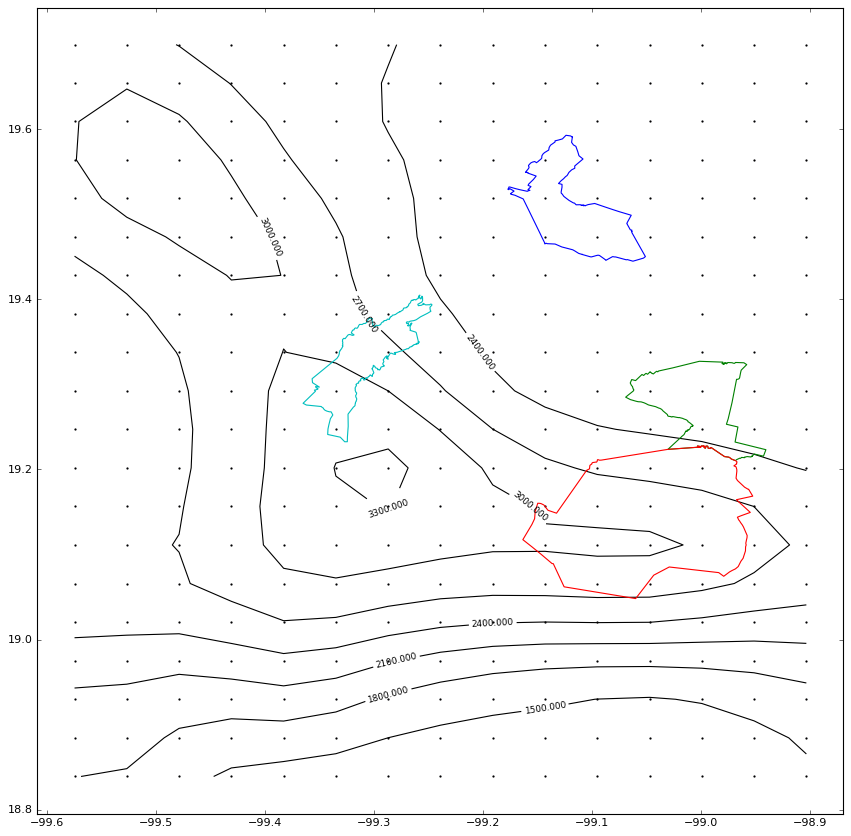

In [76]:
fig = plt.figure(figsize=(13,13))
Cs = plt.contour(mar_24['XLONG'][:,:, 0, 0], mar_24['XLAT'][:,:, 0, 0], mar_24['HGT'][:,:, 0, 0], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.plot(gustavo_a_madero.lon, gustavo_a_madero.lat)
plt.plot(tlahuac.lon, tlahuac.lat)
plt.plot(milpa_alta.lon, milpa_alta.lat)
plt.plot(cuajimalpa.lon, cuajimalpa.lat)
plt.scatter(mar_24['XLONG'][:,:, 0, 0], mar_24['XLAT'][:,:, 0, 0], s = 1)

In [69]:
mar_24['XLONG'].shape

(15, 20, 24, 31)

In [30]:
mar_24['V'].shape

(15, 20, 49, 24, 31)

In [70]:
mar_24['HGT'].shape

(15, 20, 24, 31)

In [65]:
def chop_extradim(dir_month):
    for i in dir_month:
        print(i)
        print(dir_month[i].shape)
        if len(dir_month[i].shape) == 5:
            dir_month[i] = dir_month[i][:,:20,:,:,:]
        elif len(dir_month[i].shape) == 4:
            dir_month[i] = dir_month[i][:,:20,:,:]
        print(dir_month[i].shape)
        print('-----')

In [66]:
chop_extradim(mar_48)

U
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
PBLH
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
HGT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
PHB
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----
XLONG
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
Z
(15, 21, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
XLAT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
V
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
PH
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----


In [62]:
for i in mar_24:
    print(i)
    print(mar_24[i].shape)
    if len(mar_24[i].shape) == 5:
        mar_24[i] = mar_24[i][:,:20,:,:,:]
    elif len(mar_24[i].shape) == 4:
        mar_24[i] = mar_24[i][:,:20,:,:]
    print(mar_24[i].shape)
    print('-----')

U
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
PBLH
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
HGT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
PHB
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----
XLONG
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
Z
(15, 21, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
XLAT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
V
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
PH
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----


# Fusionando 24 y 48, para sacar las 30 horas del ciclo local

In [96]:
mar_24['U'].shape

(15, 20, 49, 24, 31)

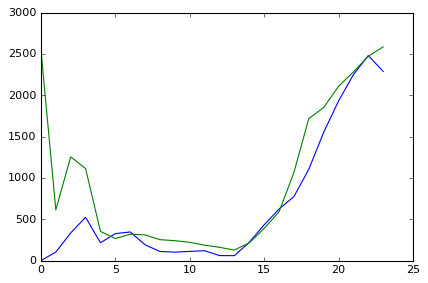

In [79]:
plt.plot(mar_24['PBLH'][10, 12, :, 1])
plt.plot(mar_48['PBLH'][10, 12, :, 1])

In [89]:
B = np.zeros((15, 20, 24, 31))
B[:,:, :18, :] = mar_24['PBLH'][:, :, 6:24, :]
B[:,:, 18:24, :] = mar_48['PBLH'][:, :, 0:6, :]

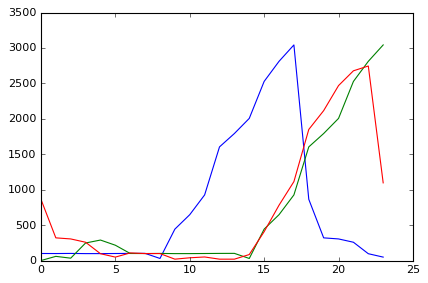

In [95]:
day = 3
nx = 13
ny = 15
plt.plot(B[nx, ny, :, day])
plt.plot(mar_24['PBLH'][nx, ny, :, day])
plt.plot(mar_48['PBLH'][nx, ny, :, day])

In [104]:
def concatenate_24_48(dir_month_24, dir_month_48):
    D ={}
    for i in dir_month_24:
        print(i)
        if len(dir_month_24[i].shape) == 5:
            B = np.zeros_like(dir_month_24[i])
            B[:, :, :, :18, :] = dir_month_24[i][:, :, :, 6:24, :]
            B[:, :, :, 18:24, :] = dir_month_48[i][:, :, :, 0:6, :]
            
            
        elif len(dir_month_24[i].shape) == 4:
            B = np.zeros_like(dir_month_24[i])
            B[:,:, :18, :] = dir_month_24[i][:, :, 6:24, :]
            B[:,:, 18:24, :] = dir_month_48[i][:, :, 0:6, :]
            
        D[i] = B
            
        print('-----')
    return D

In [105]:
C = concatenate_24_48(mar_24, mar_48)

U
-----
PBLH
-----
HGT
-----
PHB
-----
XLONG
-----
Z
-----
XLAT
-----
V
-----
PH
-----


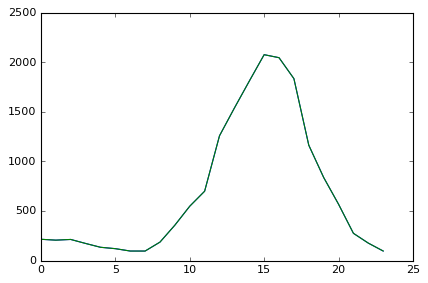

In [109]:
day = 7
nx = 13
ny = 15
plt.plot(B[nx, ny, :, day])
plt.plot(C['PBLH'][nx, ny, :, day])

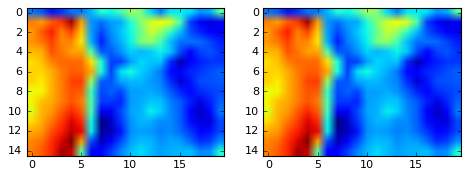

In [132]:
day = 7
hour = 10
level = 0
fig = plt.figure(figsize=(7,8))
ax1 = plt.subplot(121)
ax1.imshow(C['V'][:,:, level, hour, day])
if hour < 18:
    ax2 = plt.subplot(122)
    ax2.imshow(mar_24['V'][:,:, level, hour+6, day])
elif hour >= 18:
    ax2 = plt.subplot(122)
    ax2.imshow(mar_48['V'][:,:, level, hour-18, day])

# Cálculo de coeficientes de ventilación

$$I_U = \int_{0}^{H} U(z) dz$$
$$I_V = \int_{0}^{H} V(z) dz$$
$$I_{UV} = \int_{0}^{H} UV(z) dz = \int_{0}^{H} \sqrt{U^2 + V^2} dz$$
Con $H = PBLH(x,y)$.

In [133]:
mar_UTCm6 = concatenate_24_48(mar_24, mar_48)

U
-----
PBLH
-----
HGT
-----
PHB
-----
XLONG
-----
Z
-----
XLAT
-----
V
-----
PH
-----


In [136]:
shh = mar_UTCm6['U'].shape

In [137]:
shh

(15, 20, 49, 24, 31)

In [139]:
shh[0]

15

In [168]:
def find_pblh_index(pblh, hgt, z):
    index = 0
    for i in range(0, len(z)):
        if z[i] > pblh+hgt:
            index = i
            break
    return index

In [169]:
t = 22
jj = []
zz = []
for j in range(0,24):
    iii = find_pblh_index(mar_UTCm6['PBLH'][10,10, j,4], mar_UTCm6['HGT'][10,10, j,4], mar_UTCm6['Z'][10,10, :,j,4])
    jj.append(iii)
    zz.append(mar_UTCm6['Z'][10,10, iii,j,4])

In [171]:
jj

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 9,
 14,
 17,
 21,
 23,
 24,
 25,
 26,
 22,
 12,
 11,
 9,
 10,
 11,
 11]

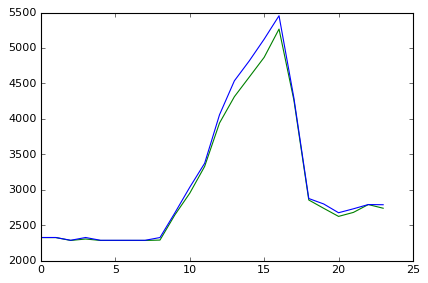

In [174]:
plt.plot(mar_UTCm6['PBLH'][10,10, :,4] + mar_UTCm6['HGT'][10,10, :,4], c = 'g')
#plt.plot(mar_UTCm6['Z'][10,10, ,j,4])
plt.plot(zz)

In [228]:
treses = np.array(range(0,5))
doseses = np.zeros(5) + 2

In [232]:
treses**2

array([ 0,  1,  4,  9, 16])

In [234]:
np.sqrt(treses**2 + doseses)

array([ 1.41421356,  1.73205081,  2.44948974,  3.31662479,  4.24264069])

In [180]:
cc = np.linspace(0, 5)

In [182]:
cc[:2+1]

array([ 0.        ,  0.10204082,  0.20408163])

In [264]:
def I_vent(dir_month):
    
    U = dir_month['U']
    V = dir_month['V']
    PBLH = dir_month['PBLH']
    HGT = dir_month['HGT']
    Z = dir_month['Z']
    
    u_shape = (U.shape[0], U.shape[1], U.shape[3], U.shape[4])
    I_vent_U = np.zeros(u_shape, dtype='float32')
    I_vent_V = np.zeros(u_shape, dtype='float32')
    I_vent_UV = np.zeros(u_shape, dtype='float32')

    for d in range(0, U.shape[4]):
        for t in range(0, U.shape[3]):
            for y in range(0, U.shape[1]):
                for x in range(0, U.shape[0]):
                    ii = find_pblh_index(PBLH[x,y,t,d], HGT[x,y,t,d], Z[x,y,:,t, d])
                    I_vent_U[x,y, t, d] = sum(U[x,y, :ii+1, t, d])
                    I_vent_V[x,y, t, d] = sum(V[x,y, :ii+1, t, d])
                    I_vent_UV[x,y, t, d] = sum(np.sqrt(U[x,y, :ii+1, t, d]**2 + V[x,y, :ii+1, t, d]**2))
                    
                    
    dir_month['I_vent_U'] = I_vent_U
    dir_month['I_vent_V'] = I_vent_V
    dir_month['I_vent_UV'] = I_vent_UV

In [265]:
I_vent(mar_UTCm6)

In [266]:
mar_UTCm6.keys()

dict_keys(['U', 'PBLH', 'I_vent_UV', 'XLAT', 'PHB', 'XLONG', 'V', 'HGT', 'I_vent_U', 'Z', 'I_vent_V', 'PH'])

In [193]:
A.shape

(15, 20, 24, 31)

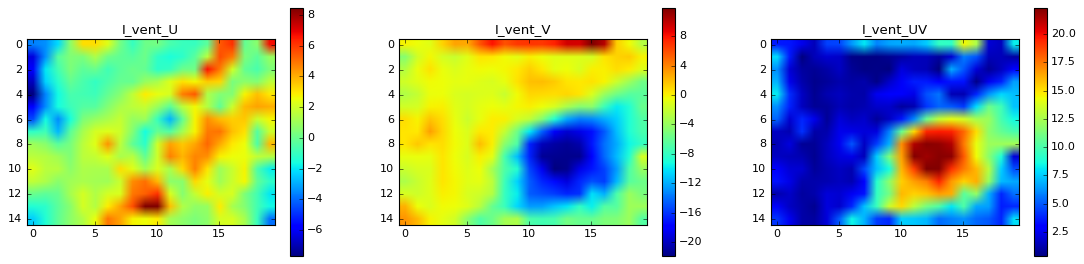

In [296]:
hour = 8
day = 7
fig = plt.figure(figsize=(17,4))
ax1 = plt.subplot(131)
plt.imshow(mar_UTCm6['I_vent_U'][:,:, hour, day])
plt.colorbar()
ax1.set_title('I_vent_U')
ax2 = plt.subplot(132)
plt.imshow(mar_UTCm6['I_vent_V'][:,:, hour, day])
plt.colorbar()
ax2.set_title('I_vent_V')
ax3 = plt.subplot(133)
plt.imshow(mar_UTCm6['I_vent_UV'][:,:, hour, day])
plt.colorbar()
ax3.set_title('I_vent_UV')

# Último índice: $|U \cdot \nabla b|$

In [241]:
b = mar_UTCm6['HGT'][:,:,10, 19]

In [263]:
grad_b = np.gradient(b)

In [262]:
np.dot([mar_UTCm6['U'][2,2,0, 4, 10], mar_UTCm6['V'][2,2,0, 4, 10]], [grad_b[0][2,2], grad_b[1][2,2]])

-769.78243586057215

In [252]:
U_vect = [mar_UTCm6['U'][:,:,0,10, 19], mar_UTCm6['V'][:,:,0,10, 19]]

In [254]:
np.dot(U_vect, grad_b)

ValueError: shapes (2,15,20) and (2,15,20) not aligned: 20 (dim 2) != 15 (dim 1)

In [273]:
np.abs(-5)

5

In [274]:
def VCS(dir_month):
    
    U = dir_month['U']
    V = dir_month['V']
    b = dir_month['HGT'][:,:,0,0]
    grad_b = np.gradient(b)
    
    u_shape = (U.shape[0], U.shape[1], U.shape[3], U.shape[4])
    I_VCS = np.zeros(u_shape, dtype='float32')

    for d in range(0, U.shape[4]):
        for t in range(0, U.shape[3]):
            for y in range(0, U.shape[1]):
                for x in range(0, U.shape[0]):
                    grad_b_vect = [grad_b[0][x,y], grad_b[1][x,y]]
                    U_vect = [U[x,y,0,t,d], V[x,y,0,t,d]]
                    I_VCS[x,y, t, d] = np.abs(np.dot(U_vect, grad_b_vect))
                    
                    
    dir_month['I_VCS'] = I_VCS

In [275]:
VCS(mar_UTCm6)

In [276]:
mar_UTCm6.keys()

dict_keys(['U', 'PBLH', 'I_vent_UV', 'XLAT', 'PHB', 'XLONG', 'V', 'I_VCS', 'HGT', 'I_vent_U', 'Z', 'I_vent_V', 'PH'])

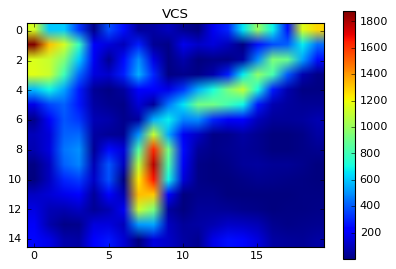

In [297]:
plt.imshow(mar_UTCm6['I_VCS'][:,:, 0, 20])
plt.colorbar()
plt.title('VCS')

# Save directory to .mat

In [ ]:
sio.savemat

In [298]:
sio.savemat('/Users/claudiopierard/WRF/Datos/WRF/VC/mar/mar_utcm6.mat', mar_UTCm6)

# Lo mismo pero para SEPTIEMBRE

In [299]:
file_sep_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/sep/09_hrs_24.mat')
sep_24 = blt.import_var_mat_VC(file_sep_24)
file_sep_48 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/sep/09_hrs_48.mat')
sep_48 = blt.import_var_mat_VC(file_sep_48)

In [300]:
chop_extradim(sep_24)
chop_extradim(sep_48)

U
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
PBLH
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
HGT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
PHB
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
XLONG
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
Z
(15, 21, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
XLAT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
V
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
PH
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
U
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
PBLH
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
HGT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
PHB
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
XLONG
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
Z
(15, 21, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
XLAT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
V
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
PH
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----


In [302]:
sep_UTCm6 = concatenate_24_48(sep_24, sep_48)

U
-----
PBLH
-----
HGT
-----
PHB
-----
XLONG
-----
Z
-----
XLAT
-----
V
-----
PH
-----


In [303]:
I_vent(sep_UTCm6)

In [304]:
VCS(sep_UTCm6)

In [305]:
sep_UTCm6.keys()

dict_keys(['U', 'PBLH', 'I_vent_UV', 'XLAT', 'PHB', 'XLONG', 'V', 'I_VCS', 'HGT', 'I_vent_U', 'Z', 'I_vent_V', 'PH'])

In [306]:
sio.savemat('/Users/claudiopierard/WRF/Datos/WRF/VC/sep/sep_utcm6.mat', sep_UTCm6)